In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio  
import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff  
from plotly.subplots import make_subplots  
from plotly.validators.scatter.marker import SymbolValidator

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
df = pd.read_csv('../../29CM_PJT_data/real_jjin.csv')

In [4]:
df = df.drop(columns = 'Unnamed: 0')
df

,user_no,event_timestamp,event_name,item_no,device_type,mobile_brand_name,country,region,item_name,image_name,price,category1_name,category2_name,category3_name,brand_name,birth_date,gender
0,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 00:45:15.131034,click_item,LpYG/noVchHgoBnNcZVSIg==,mobile,Apple,South Korea,Seoul,[소이현 착용]Lily rounded skirts,778929fe4c9cb55cf31c10eeb32d511f,109000.0,의류,하의,스커트,Ouimaisnon,1994-03-02,F
1,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:25:21.016,click_item,FZVq83GdcPJgr3wrEHJhhw==,mobile,Apple,South Korea,Seoul,[ESSENTIAL] Leather-trimmed Canvas Shoulder Ba...,5acc87218ef184aa1427aaa05de1629b,258000.0,잡화,가방,숄더백,KINDERSALMON,1994-03-02,F
2,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:25:33.954012,click_item,h+dr/MasdQuHEsGeGEkLNA==,mobile,Apple,South Korea,Seoul,[ESSENTIAL] Mini Leather-trimmed Canvas Crossb...,4015d3c02f384e1d55cdace5a1cc099f,218000.0,잡화,가방,크로스백,KINDERSALMON,1994-03-02,F
3,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:27:09.349055,click_item,sFHqN8DrrD8kMKDmsaQHSQ==,mobile,Apple,South Korea,Seoul,SILKY SHIRTS - IVORY,c966009d15de27ae499c32d72b7b4afc,109000.0,의류,상의,셔츠/블라우스,MORE OR LESS,1994-03-02,F
4,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:27:43.951067,click_item,78y9c+k2Nn/+oaP0NR/UFA==,mobile,Apple,South Korea,Seoul,AIR BLOUSE - BROWN,d3b856c2a793a8396c8f65b65cd863a4,112000.0,의류,상의,셔츠/블라우스,MORE OR LESS,1994-03-02,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531576,a+VESOxVicnmoRFK/nDSNg==,2021-07-23 10:24:43.755015,click_item,1piCtiz5rGBfQFO3Sm1mIw==,mobile,Apple,South Korea,Gangwon-do,[장미맨숀] 모듈러 월시스템 벽선반 1750 ( NO.1-1 ),7298da347d113e2d6bab51a027f684f0,498000.0,가구/인테리어,수납가구,선반,장미맨숀,1982-11-14,F
2531577,a+VESOxVicnmoRFK/nDSNg==,2021-07-23 11:08:12.004037,click_item,hi15X0cp/d1ViDT1DrTVxQ==,mobile,Apple,South Korea,Gangwon-do,caddy bag (3color),86b585d7d61ada557d1ae5de70383958,84000.0,잡화,가방,크로스백,mazi untitled,1982-11-14,F
2531578,a+VESOxVicnmoRFK/nDSNg==,2021-07-23 18:31:13.695034,click_item,amWa/aHVwUCm2GsVGhXprw==,mobile,Apple,South Korea,Seoul,21FW ABACELL MINI BAG - BROWN,4aa90f60369a052e2e9353d7c15cda18,158000.0,잡화,가방,크로스백,LOWCLASSIC,1982-11-14,F
2531579,a+VESOxVicnmoRFK/nDSNg==,2021-07-29 18:04:24.330176,click_item,O408esdGDd8UvBwWmq9Qsg==,mobile,Apple,South Korea,Gangwon-do,[STANLEY] 스탠리 어드벤처 진공 와이드-베이스 머그 591ml,6c5909659b6cdad282b0647e8aea9b84,46000.0,스포츠/레저,캠핑,기타 캠핑용품,STANLEY,1982-11-14,F


### 구매를 기준으로 생각할 수 있는 사항들
1. 구매 물품의 카테고리는?
    - 카테고리 1, 2, 3을 나누어 조사
2. 구매자들의 지역은?
    - 수도권이 인구수가 가장 많음
3. 구매자들의 연령대는?
    - 조사 중
4. 구매 물품의 가격대는?
5. 구매자들의 성별은?
    - 해외의 경우 구매자의 수가 적어 남/여 비율이 다르지만
    - 국내의 경우 여성이 70% 이상 차지함 
6. 구매가 이루어진 환경은?

7. 위 항목들의 관계는?
8. 클릭부터 구매까지 이루어진 제품들의 특징은? (월별, 지역별)

In [5]:
# 생일이 비어있는 경우 1989-01-01로 처리 (34살이 평균 나이)
# 반응 타임스탬프와 생일정보 datetime으로 변경

df['event_timestamp'] = pd.to_datetime(df.event_timestamp, format = '%Y-%m-%d %H:%M:%S')
df['birth_date'] = pd.to_datetime(df.birth_date, format = '%Y-%m-%d', errors='coerce')
df['birth_date'] = df['birth_date'].fillna('1989-01-01')
df['birth_date'] = pd.to_datetime(df.birth_date, format = '%Y-%m-%d', errors='coerce')
df['gender'] = df['gender'].fillna('O')

In [6]:
df['age'] = 2023 - df.birth_date.dt.year

In [7]:
# 국가와 지역을 입력하지 않은 사람 11
# 지역만 입력하지 않은 사람 1143

(~(df.country.isnull())&(df.region.isnull())).sum()

1143

In [8]:
# 지역만 입력하지 않은 사람들의 나라

df.loc[(~(df.country.isnull())&(df.region.isnull())), 'country'].unique()

array(['Singapore', 'Japan', 'United States', 'Guyana', 'South Korea',
       'Hong Kong', 'China', 'British Virgin Islands', 'United Kingdom'],
      dtype=object)

### 구매 품목들의 카테고리 분포

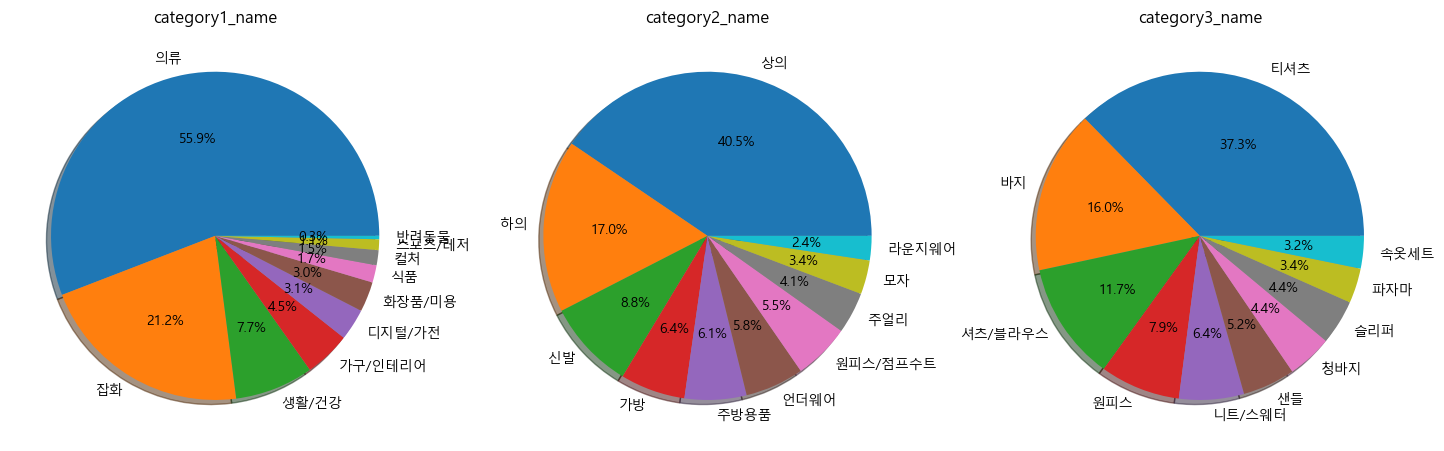

In [9]:
f, ax = plt.subplots(1, 3, figsize = (18, 8))
df.loc[(df.event_name == 'purchase_success'), 'category1_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[0], shadow=True);
ax[0].set_title('category1_name')
ax[0].set_ylabel('')

df.loc[(df.event_name == 'purchase_success'), 'category2_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[1], shadow=True);
ax[1].set_title('category2_name')
ax[1].set_ylabel('')

df.loc[(df.event_name == 'purchase_success'), 'category3_name'].value_counts()[:10].plot.pie(autopct='%1.1f%%', ax = ax[2], shadow=True);
ax[2].set_title('category3_name')
ax[2].set_ylabel('')

plt.show()

In [10]:
# 구매자들의 대부분은 한국 유저

df.loc[df['event_name']=='purchase_success', 'country'].value_counts()

South Korea             207575
Taiwan                     164
Japan                      129
Hong Kong                   33
Vietnam                     27
Singapore                   23
United States               20
United Arab Emirates        13
Australia                   13
Canada                      12
China                       11
Malaysia                    10
Indonesia                    6
Thailand                     6
Italy                        5
Qatar                        4
Finland                      3
United Kingdom               1
Lebanon                      1
Name: country, dtype: int64

In [11]:
mapper = {'Gyeonggi-do': '경기도',
         'Seoul': '서울특별시', 
         'Gyeongsangbuk-do': '경상북도', 
         'Busan': '부산광역시', 
         'Ulsan': '울산광역시', 
         'Gyeongsangnam-do': '경상남도', 
         'Chungcheongbuk-do': '충청북도', 
         'Gwangju':'광주광역시', 
         'Chungcheongnam-do': '충청남도',
         'Jeju-do': '제주특별자치도',
         'Jeollanam-do': '전라남도',
         'Daejeon': '대전광역시',
        'Jeollabuk-do': '전라북도',
        'Daegu': '대구광역시',
        'Gangwon-do': '강원도',
        'Incheon': '인천광역시'}

df.loc[df['country']=='South Korea', 'region'] = df.loc[df['country']=='South Korea', 'region'].map(mapper)

In [12]:
df_group = df.loc[df['event_name']=='purchase_success'].groupby('user_no').agg({'price' : 'sum', 'age' : 'mean', 'region' : lambda x : x, 'gender' : lambda x : x})
df_group = df_group.reset_index()

In [13]:
# 지역 정보 없는 유저 3명 - 서울특별시로 바꿈
df_group.region = df_group.region.fillna('서울특별시')
df_group

,user_no,price,age,region,gender
0,++C4Jco6ku9bc5GwwNuByQ==,436600.0,49.0,"[인천광역시, 인천광역시, 인천광역시, 인천광역시, 인천광역시, 인천광역시, 인천광...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F]"
1,++FBFfYZThncncIvHjLbKQ==,1078500.0,37.0,"[서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특...","[M, M, M, M, M, M, M, M, M, M, M, M]"
2,++GVOXP4cXADbykjQID0Xw==,898800.0,21.0,"[대구광역시, 대구광역시, 대구광역시, 대구광역시, 대구광역시, 대구광역시, 대구광...","[M, M, M, M, M, M, M, M, M, M, M]"
3,++KVqHvNPHvp3LL9SkuL8A==,225800.0,19.0,"[강원도, 강원도, 강원도, 강원도, 강원도]","[F, F, F, F, F]"
4,++KjBls4euaEX77FWJaZ/A==,4981600.0,29.0,"[서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특...","[M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, ..."
...,...,...,...,...,...
24418,zzFwuJbZhoxI4GAvblPbdw==,414950.0,34.0,"[경기도, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F]"
24419,zzLGF7vXyODnAkQWIcqX0g==,639000.0,27.0,"[경기도, 경기도, 경기도, 경기도, 경기도, 경기도]","[F, F, F, F, F, F]"
24420,zzQb08qbNg8VZ+c3wMVhuw==,413700.0,51.0,"[서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특별시, 서울특...","[F, F, F, F, F, F, F, F]"
24421,zzdYrjo38ulKskx8y5+hWw==,208000.0,30.0,"[서울특별시, 서울특별시, 서울특별시]","[O, O, O]"


In [14]:
# 가장 많이 결제한 지역을 대표 지역으로 선정
from collections import Counter
for row in df_group.iterrows():
    counts2 = Counter(row[1]['gender'])
    if type(row[1]['region']) is np.ndarray :
        counts1 = Counter(row[1]['region'])
        df_group.iloc[row[0], 3] = counts1.most_common(1)[0][0]
    df_group.iloc[row[0], 4] = counts2.most_common(1)[0][0]
        

In [15]:
df_group

,user_no,price,age,region,gender
0,++C4Jco6ku9bc5GwwNuByQ==,436600.0,49.0,인천광역시,F
1,++FBFfYZThncncIvHjLbKQ==,1078500.0,37.0,서울특별시,M
2,++GVOXP4cXADbykjQID0Xw==,898800.0,21.0,대구광역시,M
3,++KVqHvNPHvp3LL9SkuL8A==,225800.0,19.0,강원도,F
4,++KjBls4euaEX77FWJaZ/A==,4981600.0,29.0,서울특별시,M
...,...,...,...,...,...
24418,zzFwuJbZhoxI4GAvblPbdw==,414950.0,34.0,서울특별시,F
24419,zzLGF7vXyODnAkQWIcqX0g==,639000.0,27.0,경기도,F
24420,zzQb08qbNg8VZ+c3wMVhuw==,413700.0,51.0,서울특별시,F
24421,zzdYrjo38ulKskx8y5+hWw==,208000.0,30.0,서울특별시,O


In [16]:
value = df_group.region.value_counts()
value = value.reset_index()
value

,index,region
0,서울특별시,13053
1,경기도,4314
2,부산광역시,1420
3,대구광역시,806
4,인천광역시,777
5,경상남도,557
6,충청남도,510
7,대전광역시,481
8,경상북도,397
9,광주광역시,386


In [17]:
import json

with open('../../29CM_PJT_data/korea_geojson2.geojson', encoding='UTF-8') as f:
    data = json.load(f)
    
for x in data['features']:
    x['id'] = x['properties']['CTP_KOR_NM'] 
    
for idx, _ in enumerate(data['features']):
    print(data['features'][idx]['id'])

강원도
경기도
경상남도
경상북도
광주광역시
대구광역시
대전광역시
부산광역시
서울특별시
세종특별자치시
울산광역시
인천광역시
전라남도
전라북도
제주특별자치도
충청남도
충청북도


### 구매자들 지역 분포

In [18]:
fig = px.choropleth_mapbox(
   value, 
   geojson=data, 
   locations='index', 
   color='region',
   color_continuous_scale=px.colors.sequential.Redor,
   # featureidkey="properties.CTP_KOR_NM", # featureidkey를 사용하여 id 값을 갖는 키값 지정
   mapbox_style="carto-positron",
   zoom=5.5, 
   center = {"lat": 35.757981, "lon": 127.661132},
   opacity=0.6,
   labels={'region':'유저수'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [19]:
df_group

,user_no,price,age,region,gender
0,++C4Jco6ku9bc5GwwNuByQ==,436600.0,49.0,인천광역시,F
1,++FBFfYZThncncIvHjLbKQ==,1078500.0,37.0,서울특별시,M
2,++GVOXP4cXADbykjQID0Xw==,898800.0,21.0,대구광역시,M
3,++KVqHvNPHvp3LL9SkuL8A==,225800.0,19.0,강원도,F
4,++KjBls4euaEX77FWJaZ/A==,4981600.0,29.0,서울특별시,M
...,...,...,...,...,...
24418,zzFwuJbZhoxI4GAvblPbdw==,414950.0,34.0,서울특별시,F
24419,zzLGF7vXyODnAkQWIcqX0g==,639000.0,27.0,경기도,F
24420,zzQb08qbNg8VZ+c3wMVhuw==,413700.0,51.0,서울특별시,F
24421,zzdYrjo38ulKskx8y5+hWw==,208000.0,30.0,서울특별시,O


### 구매자들 지역별 성별 분포

In [20]:
pd.crosstab(df_group.region, df_group.gender, normalize='index').style.background_gradient(cmap = 'summer_r')

gender,F,M,O
region,,,
Aichi,1.000000,0.000000,0.000000
Bangkok,0.000000,1.000000,0.000000
Banten,1.000000,0.000000,0.000000
Binh Duong,1.000000,0.000000,0.000000
California,0.500000,0.000000,0.500000
Doha,1.000000,0.000000,0.000000
Dubai,0.000000,0.000000,1.000000
Fukuoka,1.000000,0.000000,0.000000
Ho Chi Minh City,0.333333,0.333333,0.333333


### 구매가 이루어진 물품들의 특징 파악
- 클릭 후 구매까지의 기간 파악
- 구매 물품들의 평균 이벤트 수 

In [25]:
purchase_df = pd.merge(df.loc[df['event_name']=='purchase_success'][['user_no', 'item_no']], df, how='left', on=['user_no', 'item_no'])
purchase_df

,user_no,item_no,event_timestamp,event_name,device_type,mobile_brand_name,country,region,item_name,image_name,price,category1_name,category2_name,category3_name,brand_name,birth_date,gender,age
0,BbMDxDofKWmrkqGJGjZRjA==,S6VLcrg21I4QHy9OGrjDiw==,2021-06-10 18:22:24.252014,click_item,mobile,Apple,South Korea,서울특별시,half box shirt - white,a7ec4395819330a593080f316a2313f6,147000.0,의류,상의,셔츠/블라우스,MOIA(매입),1994-03-02,F,29
1,BbMDxDofKWmrkqGJGjZRjA==,S6VLcrg21I4QHy9OGrjDiw==,2021-06-10 18:23:16.388027,click_item,mobile,Apple,South Korea,서울특별시,half box shirt - white,a7ec4395819330a593080f316a2313f6,147000.0,의류,상의,셔츠/블라우스,MOIA(매입),1994-03-02,F,29
2,BbMDxDofKWmrkqGJGjZRjA==,S6VLcrg21I4QHy9OGrjDiw==,2021-06-10 22:40:50.623004,purchase_success,mobile,Apple,South Korea,서울특별시,half box shirt - white,a7ec4395819330a593080f316a2313f6,147000.0,의류,상의,셔츠/블라우스,MOIA(매입),1994-03-02,F,29
3,BbMDxDofKWmrkqGJGjZRjA==,Bxl8EmzK2k7bseEAeBrgkA==,2021-06-21 00:24:22.606037,click_item,mobile,Apple,South Korea,서울특별시,Vert Sleeveless Knit (navy),b2edd3ea7a27979802c876899e4b0e55,59000.0,의류,상의,니트/스웨터,fadeiin,1994-03-02,F,29
4,BbMDxDofKWmrkqGJGjZRjA==,Bxl8EmzK2k7bseEAeBrgkA==,2021-06-21 10:18:54.181004,purchase_success,mobile,Apple,South Korea,서울특별시,Vert Sleeveless Knit (navy),b2edd3ea7a27979802c876899e4b0e55,59000.0,의류,상의,니트/스웨터,fadeiin,1994-03-02,F,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626683,a+VESOxVicnmoRFK/nDSNg==,e/FzK1ZQWsGBOmVouLDu/A==,2021-07-14 13:22:48.046026,click_item,mobile,Apple,South Korea,경기도,1 MILE PANTS,da9c04f30c0b96e0bc8b0c0c71521551,69000.0,성년의날,하의,바지,hideout,1982-11-14,F,41
626684,a+VESOxVicnmoRFK/nDSNg==,hDsDlg9Y8XLRbeaOF5p3dQ==,2021-07-07 18:25:20.619006,click_item,mobile,Apple,South Korea,강원도,1 MILE HALF PANTS(blue),079380df64e08d71cfc18186c7184a69,49000.0,의류,하의,바지,hideout,1982-11-14,F,41
626685,a+VESOxVicnmoRFK/nDSNg==,hDsDlg9Y8XLRbeaOF5p3dQ==,2021-07-07 18:25:37.240019,click_item,mobile,Apple,South Korea,강원도,1 MILE HALF PANTS(blue),079380df64e08d71cfc18186c7184a69,49000.0,의류,하의,바지,hideout,1982-11-14,F,41
626686,a+VESOxVicnmoRFK/nDSNg==,hDsDlg9Y8XLRbeaOF5p3dQ==,2021-07-07 19:25:02.235006,purchase_success,mobile,Apple,South Korea,강원도,1 MILE HALF PANTS(blue),079380df64e08d71cfc18186c7184a69,49000.0,의류,하의,바지,hideout,1982-11-14,F,41


In [45]:
purchase_df['event_duration'] = 0

In [46]:
purchase_df['event_count'] = 0

In [48]:
start = purchase_df.iloc[0]
count = 1
for row in purchase_df.iterrows():
    if row[1]['item_no'] != start['item_no']:
        start = row[1]
        count = 1
        continue
    count+=1
    if row[1]['event_name'] == 'purchase_success':
        purchase_df.event_duration[row[0]] = row[1]['event_timestamp'] - start['event_timestamp']
        purchase_df.event_count[row[0]]=count
    

In [51]:
purchase_df[['user_no', 'item_no', 'event_timestamp', 'event_name', 'event_duration', 'event_count',
       'device_type', 'mobile_brand_name', 'country', 'region', 'item_name',
       'image_name', 'price', 'category1_name', 'category2_name',
       'category3_name', 'brand_name', 'birth_date', 'gender', 'age']].head(30)

,user_no,item_no,event_timestamp,event_name,event_duration,event_count,device_type,mobile_brand_name,country,region,item_name,image_name,price,category1_name,category2_name,category3_name,brand_name,birth_date,gender,age
0,BbMDxDofKWmrkqGJGjZRjA==,S6VLcrg21I4QHy9OGrjDiw==,2021-06-10 18:22:24.252014,click_item,0,0,mobile,Apple,South Korea,서울특별시,half box shirt - white,a7ec4395819330a593080f316a2313f6,147000.0,의류,상의,셔츠/블라우스,MOIA(매입),1994-03-02,F,29
1,BbMDxDofKWmrkqGJGjZRjA==,S6VLcrg21I4QHy9OGrjDiw==,2021-06-10 18:23:16.388027,click_item,0,0,mobile,Apple,South Korea,서울특별시,half box shirt - white,a7ec4395819330a593080f316a2313f6,147000.0,의류,상의,셔츠/블라우스,MOIA(매입),1994-03-02,F,29
2,BbMDxDofKWmrkqGJGjZRjA==,S6VLcrg21I4QHy9OGrjDiw==,2021-06-10 22:40:50.623004,purchase_success,0 days 04:18:26.370990,4,mobile,Apple,South Korea,서울특별시,half box shirt - white,a7ec4395819330a593080f316a2313f6,147000.0,의류,상의,셔츠/블라우스,MOIA(매입),1994-03-02,F,29
3,BbMDxDofKWmrkqGJGjZRjA==,Bxl8EmzK2k7bseEAeBrgkA==,2021-06-21 00:24:22.606037,click_item,0,0,mobile,Apple,South Korea,서울특별시,Vert Sleeveless Knit (navy),b2edd3ea7a27979802c876899e4b0e55,59000.0,의류,상의,니트/스웨터,fadeiin,1994-03-02,F,29
4,BbMDxDofKWmrkqGJGjZRjA==,Bxl8EmzK2k7bseEAeBrgkA==,2021-06-21 10:18:54.181004,purchase_success,0 days 09:54:31.574967,2,mobile,Apple,South Korea,서울특별시,Vert Sleeveless Knit (navy),b2edd3ea7a27979802c876899e4b0e55,59000.0,의류,상의,니트/스웨터,fadeiin,1994-03-02,F,29
5,BbMDxDofKWmrkqGJGjZRjA==,ItUK586vWTWmvMg8DvxtMA==,2021-06-21 00:23:10.325019,click_item,0,0,mobile,Apple,South Korea,서울특별시,Vert Half Cardigan (navy),24ae3a9fee6b91f1010b80589bc19e51,112000.0,의류,상의,카디건,fadeiin,1994-03-02,F,29
6,BbMDxDofKWmrkqGJGjZRjA==,ItUK586vWTWmvMg8DvxtMA==,2021-06-21 10:18:54.182005,purchase_success,0 days 09:55:43.856986,2,mobile,Apple,South Korea,서울특별시,Vert Half Cardigan (navy),24ae3a9fee6b91f1010b80589bc19e51,112000.0,의류,상의,카디건,fadeiin,1994-03-02,F,29
7,BbMDxDofKWmrkqGJGjZRjA==,f67bsEiWtq7Y8WbXayeS4w==,2021-07-04 13:07:42.112004,purchase_success,0,0,mobile,Apple,South Korea,대구광역시,뮤트 베이직 밴드 블루그레이 브라 팬티 세트,a6c98d16c70fead3d03fe6d410a9fd3b,52000.0,의류,언더웨어,속옷세트,codescombineinner,1994-03-02,F,29
8,BbMDxDofKWmrkqGJGjZRjA==,Yj0cYBIkHzicyYKyGFqcsQ==,2021-07-04 13:07:42.113005,purchase_success,0,0,mobile,Apple,South Korea,대구광역시,미니라벨 스킨 베이직 브라 팬티 세트,aae5e316b68e9ddc0a495e8fba8ce165,52000.0,의류,언더웨어,속옷세트,codescombineinner,1994-03-02,F,29
9,xCHR6qjHK6Ul3Wt3fzGJbg==,wlNuCshWZ214hlAVViHKiw==,2021-06-10 10:01:42.245004,purchase_success,0,0,mobile,Apple,South Korea,인천광역시,cotton rib socks (3colors),7e0890f478baf81a894f5a1b5fd3b36a,5900.0,잡화,양말,양말,blank03,1998-03-21,F,25


In [42]:
purchase_df.loc[purchase_df['event_duration']!=0]

,user_no,item_no,event_timestamp,event_name,event_duration,device_type,mobile_brand_name,country,region,item_name,image_name,price,category1_name,category2_name,category3_name,brand_name,birth_date,gender,age
2,BbMDxDofKWmrkqGJGjZRjA==,S6VLcrg21I4QHy9OGrjDiw==,2021-06-10 22:40:50.623004,purchase_success,0 days 04:18:26.370990,mobile,Apple,South Korea,서울특별시,half box shirt - white,a7ec4395819330a593080f316a2313f6,147000.0,의류,상의,셔츠/블라우스,MOIA(매입),1994-03-02,F,29
4,BbMDxDofKWmrkqGJGjZRjA==,Bxl8EmzK2k7bseEAeBrgkA==,2021-06-21 10:18:54.181004,purchase_success,0 days 09:54:31.574967,mobile,Apple,South Korea,서울특별시,Vert Sleeveless Knit (navy),b2edd3ea7a27979802c876899e4b0e55,59000.0,의류,상의,니트/스웨터,fadeiin,1994-03-02,F,29
6,BbMDxDofKWmrkqGJGjZRjA==,ItUK586vWTWmvMg8DvxtMA==,2021-06-21 10:18:54.182005,purchase_success,0 days 09:55:43.856986,mobile,Apple,South Korea,서울특별시,Vert Half Cardigan (navy),24ae3a9fee6b91f1010b80589bc19e51,112000.0,의류,상의,카디건,fadeiin,1994-03-02,F,29
7,BbMDxDofKWmrkqGJGjZRjA==,f67bsEiWtq7Y8WbXayeS4w==,2021-07-04 13:07:42.112004,purchase_success,0 days 00:00:00,mobile,Apple,South Korea,대구광역시,뮤트 베이직 밴드 블루그레이 브라 팬티 세트,a6c98d16c70fead3d03fe6d410a9fd3b,52000.0,의류,언더웨어,속옷세트,codescombineinner,1994-03-02,F,29
8,BbMDxDofKWmrkqGJGjZRjA==,Yj0cYBIkHzicyYKyGFqcsQ==,2021-07-04 13:07:42.113005,purchase_success,0 days 00:00:00,mobile,Apple,South Korea,대구광역시,미니라벨 스킨 베이직 브라 팬티 세트,aae5e316b68e9ddc0a495e8fba8ce165,52000.0,의류,언더웨어,속옷세트,codescombineinner,1994-03-02,F,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626678,a+VESOxVicnmoRFK/nDSNg==,yXpbzgtgRe37PEbJlBiKmQ==,2021-06-10 13:39:56.906005,purchase_success,4 days 01:43:27.433962,mobile,Apple,South Korea,경기도,[예약판매][락피쉬웨더웨어] 파스텔 첼시 레인부츠 - 3color,d94b95bf191a86da2ef681ef61fb6bd9,59000.0,잡화,신발,레인부츠/스노우부츠,Rockfish Weatherwear,1982-11-14,F,41
626679,a+VESOxVicnmoRFK/nDSNg==,yXpbzgtgRe37PEbJlBiKmQ==,2021-06-15 09:35:27.059006,purchase_success,8 days 21:38:57.586963,mobile,Apple,South Korea,서울특별시,[예약판매][락피쉬웨더웨어] 파스텔 첼시 레인부츠 - 3color,d94b95bf191a86da2ef681ef61fb6bd9,59000.0,잡화,신발,레인부츠/스노우부츠,Rockfish Weatherwear,1982-11-14,F,41
626680,a+VESOxVicnmoRFK/nDSNg==,hrxsRVJ3wyP/eMTYEgUBLw==,2021-07-07 19:25:02.232004,purchase_success,0 days 00:00:00,mobile,Apple,South Korea,강원도,SEERSUCKER EGG PANTS(Light Khaki),6c89c6d63a1ba5061b85e476073e23c0,79000.0,의류,하의,바지,hideout,1982-11-14,F,41
626681,a+VESOxVicnmoRFK/nDSNg==,e/FzK1ZQWsGBOmVouLDu/A==,2021-07-07 19:25:02.234005,purchase_success,0 days 00:00:00,mobile,Apple,South Korea,강원도,1 MILE PANTS,da9c04f30c0b96e0bc8b0c0c71521551,69000.0,성년의날,하의,바지,hideout,1982-11-14,F,41
